In [1]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
import sklearn.feature_selection
import wrangle

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score as evs

df = wrangle.wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 4 columns):
exam1          102 non-null int64
exam2          102 non-null int64
exam3          102 non-null int64
final_grade    102 non-null int64
dtypes: int64(4)
memory usage: 4.0 KB


In [3]:
df = df.dropna(axis=1)
df = df.reset_index()
df.head(11)

,index,exam1,exam2,exam3,final_grade
0,0,100,90,95,96
1,1,98,93,96,95
2,2,85,83,87,87
3,3,83,80,86,85
4,4,93,90,96,97
5,5,79,70,85,81
6,6,92,89,94,93
7,7,73,70,75,76
8,8,70,65,78,77
9,10,58,65,70,68


### 1. Split the data into train and test datasets.

In [4]:
# train, test split
train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=22)

In [5]:
# create predictions dataframe
predictions = pd.DataFrame({
    'actual': train.final_grade
})

In [6]:
# y will stay the same for the rest of the exercises
y = train.final_grade


In [7]:
# 1. make the thing: can be used throughout exercises
lm = sklearn.linear_model.LinearRegression()

### 2. Create a model that uses exam 1 to predict the final grade.

In [8]:
# X for exam 1
X_exam1 = train[['exam1']]


In [9]:
# 2. fit the thing
exam1_lm = lm.fit(X_exam1, y)

In [10]:
# 3. use the thing
predictions['exam1_simple_lm'] = exam1_lm.predict(X_exam1)
predictions.head()

,actual,exam1_simple_lm
46,70,69.433859
80,97,92.888160
26,87,86.835437
71,77,75.486582
92,85,85.322256


In [11]:
print('final_grade = {:.3f} * exam1 + {:.3f}'.format(exam1_lm.coef_[0], exam1_lm.intercept_))

final_grade = 0.757 * exam1 + 22.525


### 3. Create a model that uses exam 2 to predict the final grade.

In [12]:
# X for exam 2
X_exam2 = train[['exam2']]

In [13]:
# y was already initialized 

In [14]:
# 2. fit the thing
exam2_lm = lm.fit(X_exam2, y)

In [15]:
# 3. use the thinig
predictions['exam2_simple_lm'] = exam2_lm.predict(X_exam2)
predictions.head()

,actual,exam1_simple_lm,exam2_simple_lm
46,70,69.433859,74.936553
80,97,92.888160,94.070194
26,87,86.835437,87.373420
71,77,75.486582,70.153143
92,85,85.322256,84.503374


In [16]:
print('final_grade = {:.3f} * exam2 + {:.3f}'.format(exam2_lm.coef_[0], exam2_lm.intercept_))

final_grade = 0.957 * exam2 + 7.969


In [17]:
x_pred = np.array([-25, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

### 4. Compare your models in the following manner:
- Calculate the mean squared error
- Visualize the residuals. Create a seperate visualization for each model.
- Visualize the actual vs the predicted values. Create a seperate visualization for each model.
- **Bonus:** Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

In [18]:
MSE_Exam1 = mse(predictions.actual ,predictions.exam1_simple_lm)
MSE_Exam2 = mse(predictions.actual ,predictions.exam2_simple_lm)

In [19]:
MSE_Exam1

3.549903123784724

In [20]:
MSE_Exam2

16.504556901979687

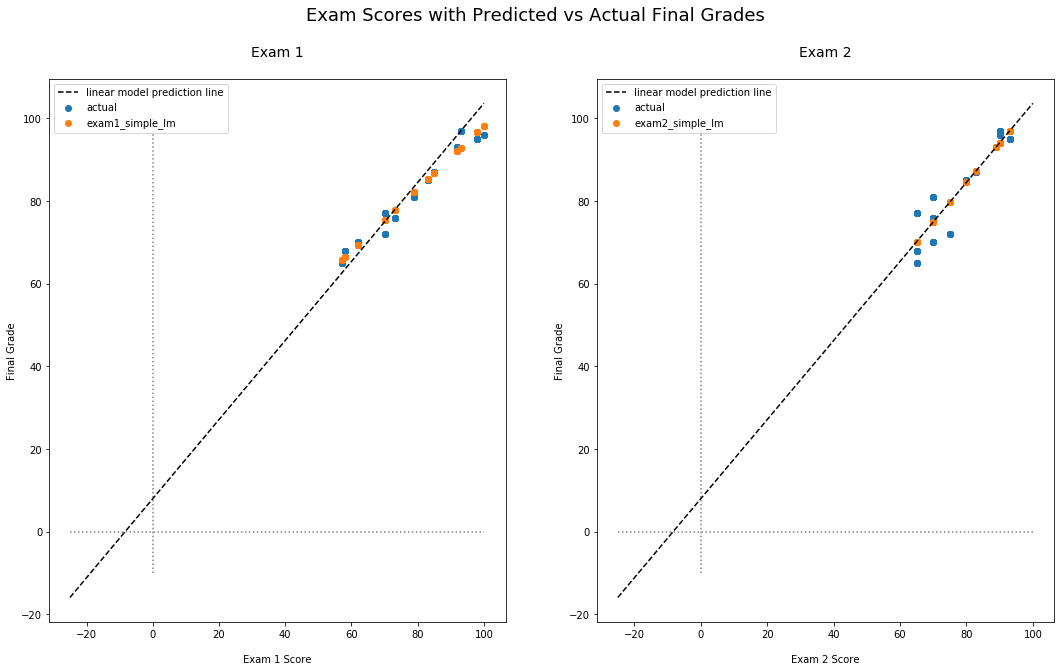

In [21]:

plt.figure(figsize=(18, 10))
plt.suptitle('Exam Scores with Predicted vs Actual Final Grades\n', fontsize=18)

# Figure 1
plt.subplot(1, 2, 1)
plt.title('Exam 1\n', fontsize=14)
plt.scatter(X_exam1, train.final_grade, label='actual')
plt.scatter(X_exam1, predictions.exam1_simple_lm, label='exam1_simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='black', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')
plt.xlabel('\nExam 1 Score')
plt.ylabel('Final Grade')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Exam 2\n', fontsize=14)
plt.scatter(X_exam2, train.final_grade, label='actual')
plt.scatter(X_exam2, predictions.exam2_simple_lm, label='exam2_simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='black', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')
plt.xlabel('\nExam 2 Score')
plt.ylabel('Final Grade')
plt.legend()

plt.show()

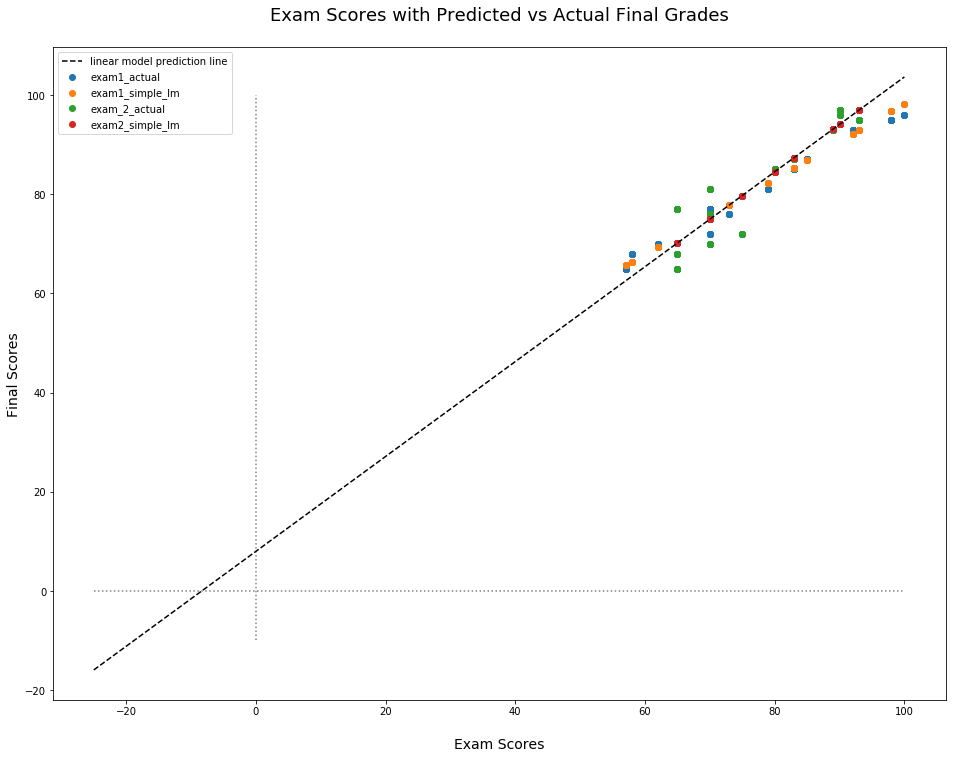

In [22]:
plt.figure(figsize=(16, 12))
plt.title('Exam Scores with Predicted vs Actual Final Grades\n', fontsize=18)

plt.scatter(X_exam1, train.final_grade, label='exam1_actual')
plt.scatter(X_exam1, predictions.exam1_simple_lm, label='exam1_simple_lm')
plt.scatter(X_exam2, train.final_grade, label='exam_2_actual')
plt.scatter(X_exam2, predictions.exam2_simple_lm, label='exam2_simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='black', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')
plt.xlabel('\nExam Scores', fontsize=14)
plt.ylabel('Final Scores', fontsize=14)
plt.legend()
plt.show()

- 

> Exam 1's model for predicting final grades works better then Exam 2's model

### 5. Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [23]:
X = train.drop(columns=['final_grade'])
y = train.final_grade

lm = sklearn.linear_model.LinearRegression()
k = 2

In [24]:
# 1. Transform our X
rfe = sklearn.feature_selection.RFE(lm, k)
rfe.fit(X, y)
print('selected top 2 features:', X.columns[rfe.support_])
X_rfe = rfe.transform(X)

selected top 2 features: Index(['exam1', 'exam3'], dtype='object')


In [25]:
# 2. Use the transformed x in the model
lm.fit(X_rfe, y)
predictions['multiple_rfe'] = lm.predict(X_rfe)
predictions.head()

,actual,exam1_simple_lm,exam2_simple_lm,multiple_rfe
46,70,69.433859,74.936553,70.682503
80,97,92.888160,94.070194,93.787751
26,87,86.835437,87.373420,86.507167
71,77,75.486582,70.153143,75.106016
92,85,85.322256,84.503374,85.044155


In [26]:
X.columns[rfe.support_]

Index(['exam1', 'exam3'], dtype='object')

In [27]:
print(f'final_grade = {lm.coef_[0]:.2f} * exam1 + {lm.coef_[1]:.2f} * exam3 + {lm.intercept_:.2f}')

final_grade = 0.59 * exam1 + 0.29 * exam3 + 11.62


### 6. Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

# Telco Churn

### 1. Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

### 2. Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

### 3. Evaluate the models and your baseline.

### 4. Select the model that performed the best, and apply it to your test data.